In [146]:
from tracemalloc import Snapshot
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
import glob
import os
import json as js



us_youtube_df = pd.read_csv('../data/USvideos.csv')
us_youtube_df.sample(5)



,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
1788,YjBB89qsupM,17.22.11,Diplo - Get It Right (Feat. MØ) (Official Lyri...,Major Lazer,10,2017-11-15T18:27:28.000Z,"Get It Right Diplo feat. Mø|""Get it Right""|""Ge...",828587,38326,654,1088,https://i.ytimg.com/vi/YjBB89qsupM/default.jpg,False,False,False,OFFICIAL LYRIC VIDEO | DIPLO - GET IT RIGHT (F...
27611,VlOq_4lmpzE,18.03.04,Miz Cracker’s Drag Transformation Tutorial | A...,Allure,24,2018-03-29T16:01:01.000Z,"drag|""rupaul""|""drag makeup""|""miz cracker""|""rup...",299822,18077,524,1536,https://i.ytimg.com/vi/VlOq_4lmpzE/default.jpg,False,False,False,"Miz Cracker, a contestant on Season 10 of RuPa..."
1460,LDVXOo_HXKU,17.21.11,Best Survivor Series sole survivors - WWE Top ...,WWE,17,2017-11-18T13:59:59.000Z,"wwe|""world wrestling entertainment""|""wrestling...",1927025,31492,1550,2680,https://i.ytimg.com/vi/LDVXOo_HXKU/default.jpg,False,False,False,Being the last Superstar standing in a Traditi...
23761,5sEaYB4rLFQ,18.15.03,Fantastic Beasts: The Crimes of Grindelwald - ...,Warner Bros. Pictures,24,2018-03-13T16:00:30.000Z,"fantastic beasts|""fantastic beasts: the crimes...",7822003,189086,4204,16829,https://i.ytimg.com/vi/5sEaYB4rLFQ/default.jpg,False,False,False,Fantastic Beasts: The Crimes of Grindelwald - ...
4865,v_CMMWCN5nQ,17.08.12,NEVER HAVE I EVER w/ TYLER OAKLEY // Grace Helbig,Grace Helbig,22,2017-12-05T20:00:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",282543,15363,346,502,https://i.ytimg.com/vi/v_CMMWCN5nQ/default.jpg,False,False,False,Tyler and I played NEVER HAVE I EVER to see wh...


In [147]:
# Identify top 10 key influencers
# correlating publish time and views to determine most popular time for viewing content
# correlating/counting views, likes, dislikes, comments
# add csv for titles of youtube video id
us_youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [148]:
#Who are the top 10 users based off likes.

sort_by_likes = us_youtube_df[['channel_title', 'likes']].sort_values('likes', ascending=False)
sort_by_likes.sample(10)


,channel_title,likes
17404,Jack Coyne,7943
26279,Marvel Entertainment,1554726
13832,Jason Yu,13075
881,The Slow Mo Guys,100566
24016,IGN,6541
2828,The Deal Guy,4146
37781,Jake Paul,82045
36704,Studio C,12532
31190,Tati,48112
27417,Liverpool FC,84036


In [149]:
popular_by_likes = (
    sort_by_likes
        .groupby(by='channel_title')
        .sum()
        .sort_values(by='likes', ascending=False)
        .head(10)
    )
popular_by_likes


,likes
channel_title,
ibighit,199247121
ChildishGambinoVEVO,96700818
Dude Perfect,60275557
Marvel Entertainment,55873344
ArianaGrandeVevo,52170970
jypentertainment,44900910
TaylorSwiftVEVO,39292840
Ed Sheeran,39279211
ZaynVEVO,31695245


In [215]:
#Who are the top 10 users based off likes.

sort_by_views = us_youtube_df[['channel_title', 'views','likes']]
sort_by_views.sample(10)

,channel_title,views,likes
20137,Genius,300373,23805
187,Chicago Sun-Times,33768,426
30483,Late Night with Seth Meyers,1540672,22917
19259,Fox News,22557,193
8897,NickJonasVEVO,208469,7405
34295,Domics,2551185,148882
6412,The Tonight Show Starring Jimmy Fallon,279522,4662
5817,Matthias,428138,16042
39442,Bachelor Nation on ABC,299863,1232
14143,GQ,797798,20083


In [151]:
popular_by_views = (
    sort_by_views
        .groupby(by=['channel_title'])
        .sum()
        .sort_values(by='views', ascending=False)
        .head(10)
    )
popular_by_views



,views
channel_title,
ChildishGambinoVEVO,3758488765
ibighit,2235906679
Dude Perfect,1870085178
Marvel Entertainment,1808998971
ArianaGrandeVevo,1576959172
MalumaVEVO,1551515831
jypentertainment,1486972132
Sony Pictures Entertainment,1432374398
FoxStarHindi,1238609854


<AxesSubplot:title={'center':'YouTube Channel Popular by Likes'}, ylabel='YouTube Channel'>

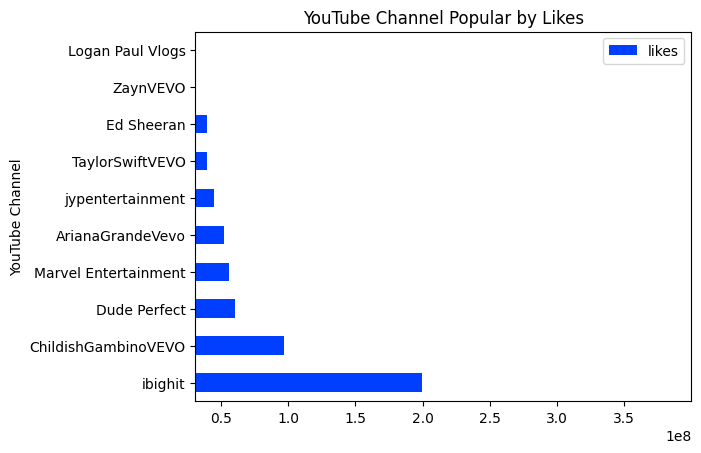

In [152]:
# 

# popular_by_likes.plot(kind='barh', 
#                         title='YouTube Channel Popular by Likes', 
#                         ylabel='Number of Likes', 
#                         xlabel='YouTube Channel', 
#                         xlim = (31000000,400000000), 
#                         xticks=range(50000000,400000000,50000000)
#                         )


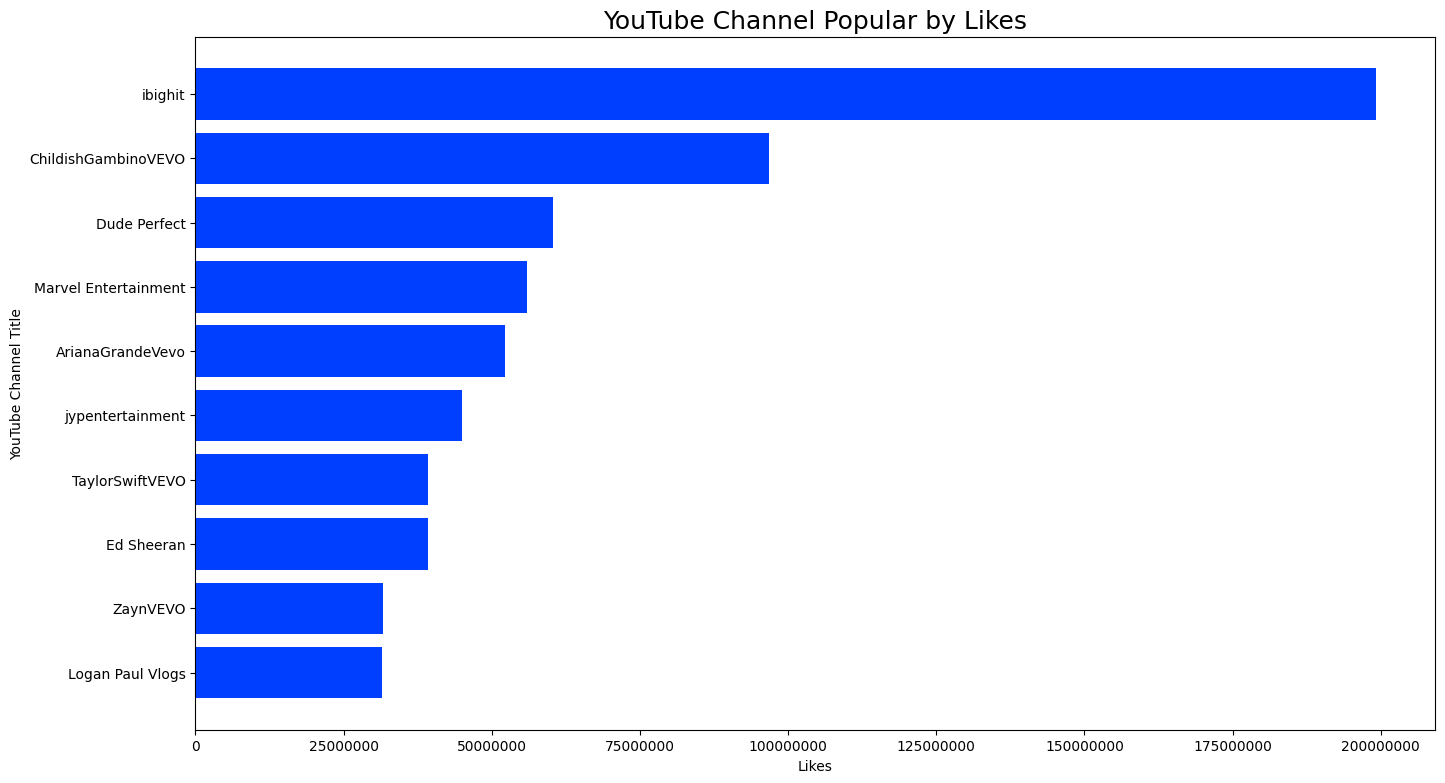

In [153]:
fig, ax = plt.subplots(figsize=(16,9))
popular_by_likes = popular_by_likes.sort_values('likes', ascending=True)
ax.barh(popular_by_likes.index, popular_by_likes['likes'])
ax.set_title('YouTube Channel Popular by Likes', fontsize=18)
ax.set_ylabel('YouTube Channel Title')
ax.set_xlabel("Likes")
ax.ticklabel_format(axis='x',style='plain')
plt.savefig('../img/YouTube Channel Popular by Likes.jpg', bbox_inches = 'tight')
plt.show()

<AxesSubplot:ylabel='channel_title'>

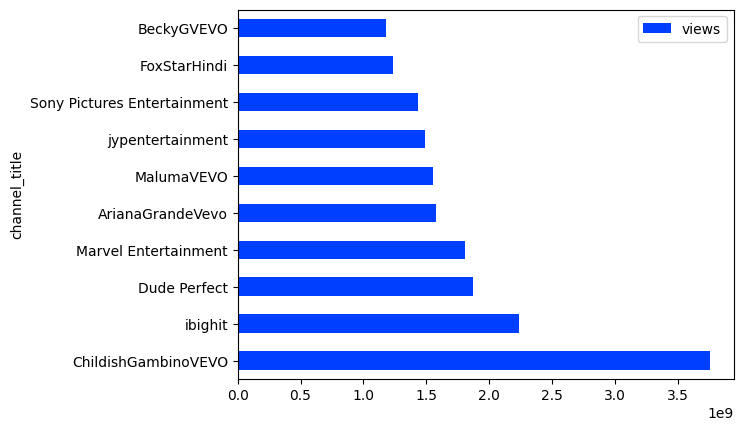

In [154]:
popular_by_views.plot(kind='barh')

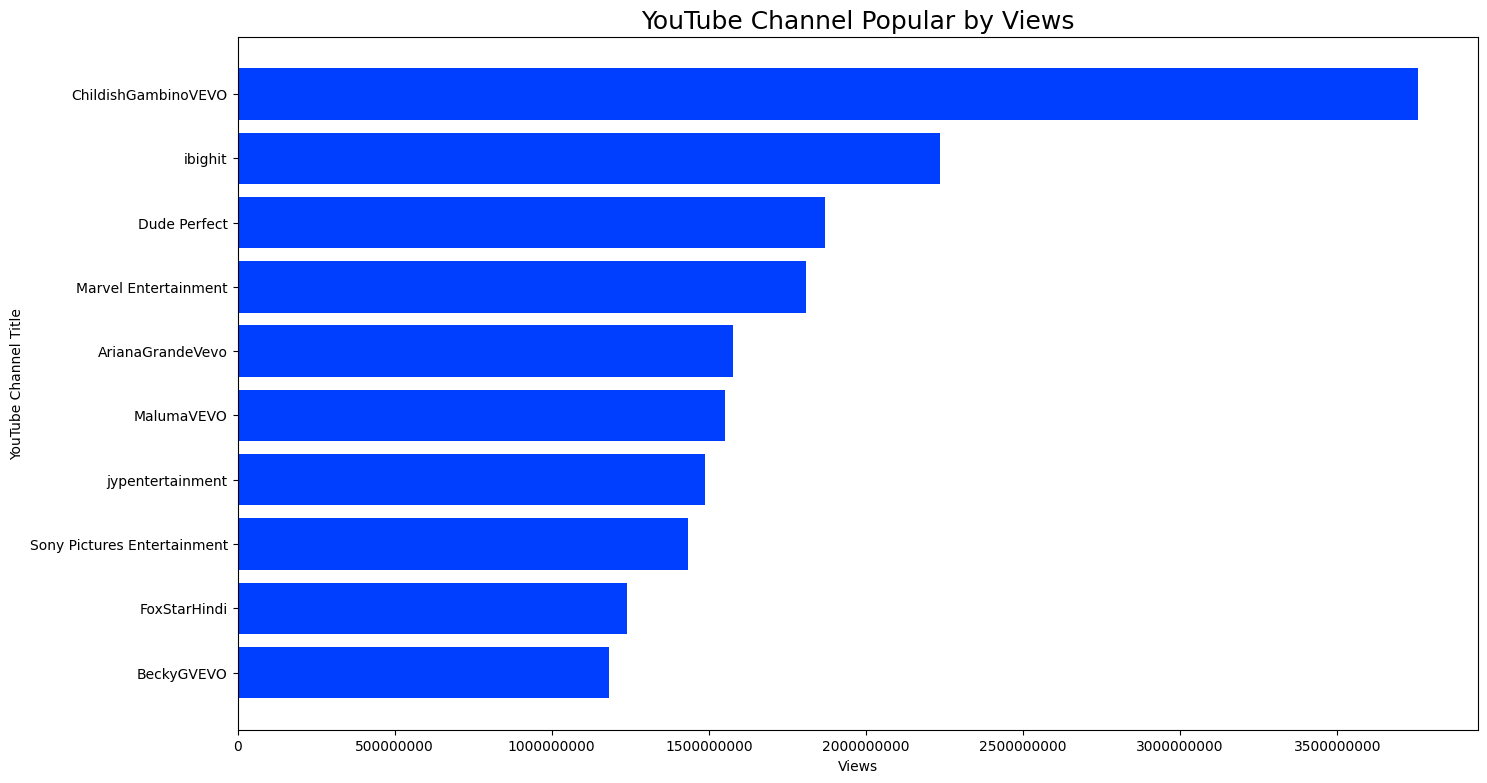

In [155]:
fig, ax = plt.subplots(figsize=(16,9))
popular_by_views = popular_by_views.sort_values('views', ascending=True)
ax.barh(popular_by_views.index, popular_by_views['views'])
ax.set_title('YouTube Channel Popular by Views', fontsize=18)
ax.set_ylabel('YouTube Channel Title')
ax.set_xlabel("Views")
ax.ticklabel_format(axis='x',style='plain')

plt.savefig('../img/YouTube Channel Popular by Views.jpg', bbox_inches = 'tight')
plt.show()

In [156]:
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-bright')


In [157]:
us_youtube_df['hour'] = pd.DatetimeIndex(us_youtube_df['publish_time']).hour
us_youtube_df['hour']
us_youtube_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,hour
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,17
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",7
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,19
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,11
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,18


In [158]:
us_youtube_df['hour'].sum()

563732

In [159]:
hour_corr = us_youtube_df[['views','likes','dislikes','hour']]
hour_corr.corr()

,views,likes,dislikes,hour
views,1.000000,0.849177,0.472213,-0.064916
likes,0.849177,1.000000,0.447186,-0.045296
dislikes,0.472213,0.447186,1.000000,-0.009750
hour,-0.064916,-0.045296,-0.009750,1.000000


In [160]:
views_times_corr = us_youtube_df.groupby(by='hour').sum()
views_times_corr.reset_index(inplace=True)
views_times_corr = views_times_corr[['views','likes','dislikes','comment_count','hour']]
views_times_corr


,views,likes,dislikes,comment_count,hour
0,2102430591,73069720,3493351,9796941,0
1,2608009982,74352959,4767974,8664745,1
2,1963268573,45572875,1324981,5331817,2
3,2722928516,68135410,3190260,6852700,3
4,9267508289,274128766,13279444,26177737,4
5,2987912716,105412432,4580425,9429649,5
6,871993900,17900061,867398,1543115,6
7,2903306925,65500127,2924998,5763321,7
8,2693147800,69970016,3587501,7430604,8
9,3477575589,160007663,4947730,27064292,9


<AxesSubplot:>

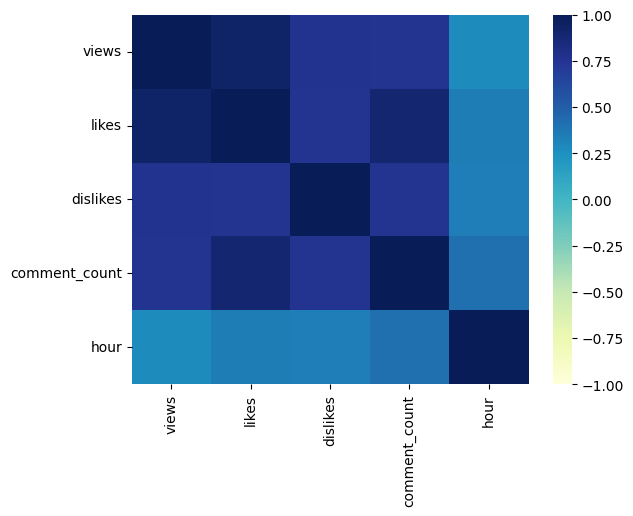

In [161]:
sns.heatmap(views_times_corr.corr(),vmin=-1,cmap='YlGnBu')

In [162]:
id_list = (
    us_youtube_df
        .groupby(by=['category_id'])
        .sum()
        .sort_values(by='views', ascending=False)
        .head(10)
    )
id_list.reset_index(inplace=True)
id_list

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,hour
0,10,40132892190,1416838584,51179008,125296396,9,24,0,77816
1,24,20604388195,530516491,42987663,73566498,196,30,8,138004
2,1,7284156721,165997476,6075148,17887060,28,14,13,34789
3,23,5117426208,216346746,7230391,22545582,2,0,0,48511
4,22,4917191726,186615999,10187901,24778032,66,37,0,44974
5,17,4404456673,98621211,5133551,11192155,28,17,2,25805
6,26,4078545064,162880075,5473899,23149550,11,11,0,61154
7,28,3487756816,82532638,4548402,11989926,90,16,0,34401
8,20,2141218625,69038284,9184466,14740713,8,0,0,12207
9,25,1473765704,18151033,4180049,6039433,174,1,0,34863


In [163]:
with open ('../data/US_category_id.json') as f:
    data = js.loads(f.read())
us_json_df = pd.json_normalize(data, record_path=['items'])
us_json_df

,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True
5,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/FJwVpGCVZ1yiJrqZb...",18,UCBR8-60-B28hp2BmDPdntcQ,Short Movies,False
6,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/M-3iD9dwK7YJCafRf...",19,UCBR8-60-B28hp2BmDPdntcQ,Travel & Events,True
7,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/WmA0qYEfjWsAoyJFS...",20,UCBR8-60-B28hp2BmDPdntcQ,Gaming,True
8,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/EapFaGYG7K0StIXVf...",21,UCBR8-60-B28hp2BmDPdntcQ,Videoblogging,False
9,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True


In [164]:
title_id = us_json_df[['id','snippet.title']].set_index('id')
title_id

,snippet.title
id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging


In [165]:
title_id.index = title_id.index.astype('int64')
title_id_dict = title_id.to_dict()
title_id_dict['snippet.title']

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [166]:
id_list['category_id_name'] = id_list['category_id'].replace(title_id_dict['snippet.title'])
id_list

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,hour,category_id_name
0,10,40132892190,1416838584,51179008,125296396,9,24,0,77816,Music
1,24,20604388195,530516491,42987663,73566498,196,30,8,138004,Entertainment
2,1,7284156721,165997476,6075148,17887060,28,14,13,34789,Film & Animation
3,23,5117426208,216346746,7230391,22545582,2,0,0,48511,Comedy
4,22,4917191726,186615999,10187901,24778032,66,37,0,44974,People & Blogs
5,17,4404456673,98621211,5133551,11192155,28,17,2,25805,Sports
6,26,4078545064,162880075,5473899,23149550,11,11,0,61154,Howto & Style
7,28,3487756816,82532638,4548402,11989926,90,16,0,34401,Science & Technology
8,20,2141218625,69038284,9184466,14740713,8,0,0,12207,Gaming
9,25,1473765704,18151033,4180049,6039433,174,1,0,34863,News & Politics


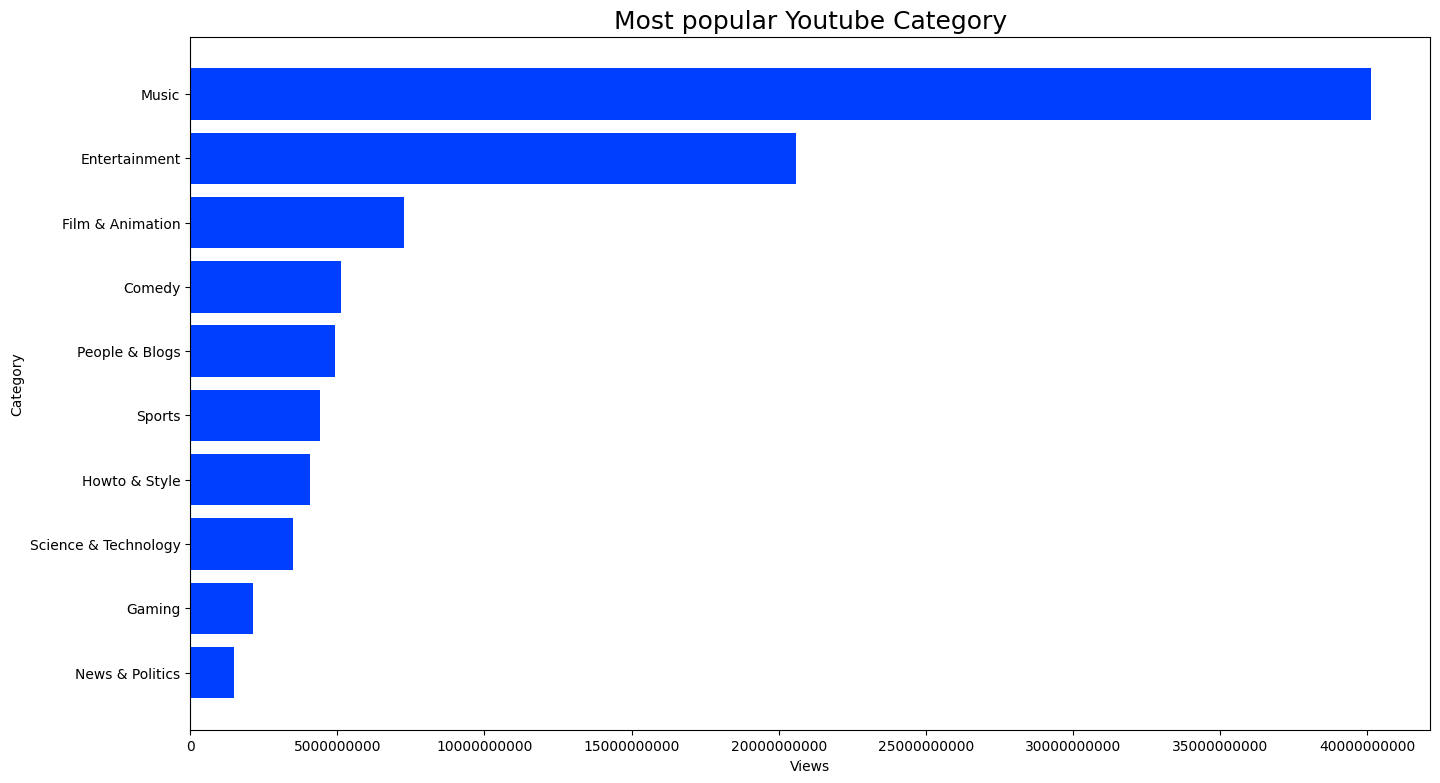

In [167]:
fig, ax = plt.subplots(figsize=(16,9))
id_list = id_list.sort_values('views', ascending=True)
ax.barh(id_list['category_id_name'], id_list['views'])
ax.set_title('Most popular Youtube Category', fontsize=18)
ax.set_ylabel('Category')
ax.set_xlabel('Views')
ax.ticklabel_format(axis='x',style='plain')
plt.savefig('../img/Most popular Youtube Category.jpg', bbox_inches = 'tight')
plt.show()

In [168]:
#id_list = id_list.set_index('category_id_name')
id_list.sort_values(by='views',ascending=False)
#top10_vs_category_name = popular_by_views.corr(id_list)

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,hour,category_id_name
0,10,40132892190,1416838584,51179008,125296396,9,24,0,77816,Music
1,24,20604388195,530516491,42987663,73566498,196,30,8,138004,Entertainment
2,1,7284156721,165997476,6075148,17887060,28,14,13,34789,Film & Animation
3,23,5117426208,216346746,7230391,22545582,2,0,0,48511,Comedy
4,22,4917191726,186615999,10187901,24778032,66,37,0,44974,People & Blogs
5,17,4404456673,98621211,5133551,11192155,28,17,2,25805,Sports
6,26,4078545064,162880075,5473899,23149550,11,11,0,61154,Howto & Style
7,28,3487756816,82532638,4548402,11989926,90,16,0,34401,Science & Technology
8,20,2141218625,69038284,9184466,14740713,8,0,0,12207,Gaming
9,25,1473765704,18151033,4180049,6039433,174,1,0,34863,News & Politics


In [184]:
id_list_all_vars = id_list[[
                'category_id_name',
                'likes',
                'views',
                            ]]
id_list_all_vars = id_list_all_vars.set_index('category_id_name')
id_list_all_vars.sort_values(by='views',ascending=False)

,likes,views
category_id_name,,
Music,1416838584,40132892190
Entertainment,530516491,20604388195
Film & Animation,165997476,7284156721
Comedy,216346746,5117426208
People & Blogs,186615999,4917191726
Sports,98621211,4404456673
Howto & Style,162880075,4078545064
Science & Technology,82532638,3487756816
Gaming,69038284,2141218625


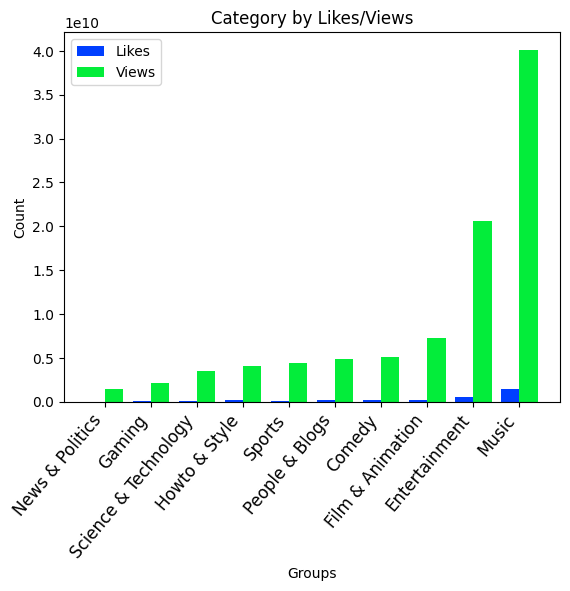

In [208]:
likes = id_list_all_vars['likes']
views = id_list_all_vars['views']
cat_name = id_list_all_vars.index
# X = ['Group A','Group B','Group C','Group D']
# Ygirls = [10,20,20,40]
# Zboys = [20,30,25,30]
  
cat_name_axis = np.arange(len(cat_name))
  
plt.bar(cat_name_axis - 0.2, likes, 0.4, label = 'Likes')
plt.bar(cat_name_axis + 0.2, views, 0.4, label = 'Views')

#ax.set_xticklabels(cat_name, rotation=60, horizontalalignment='right', fontsize='12')
plt.xticks(cat_name_axis, cat_name, rotation=50, horizontalalignment='right', fontsize='12')
plt.xlabel("Groups")
plt.ylabel("Count")
plt.title("Category by Likes/Views")
plt.legend()
plt.show()

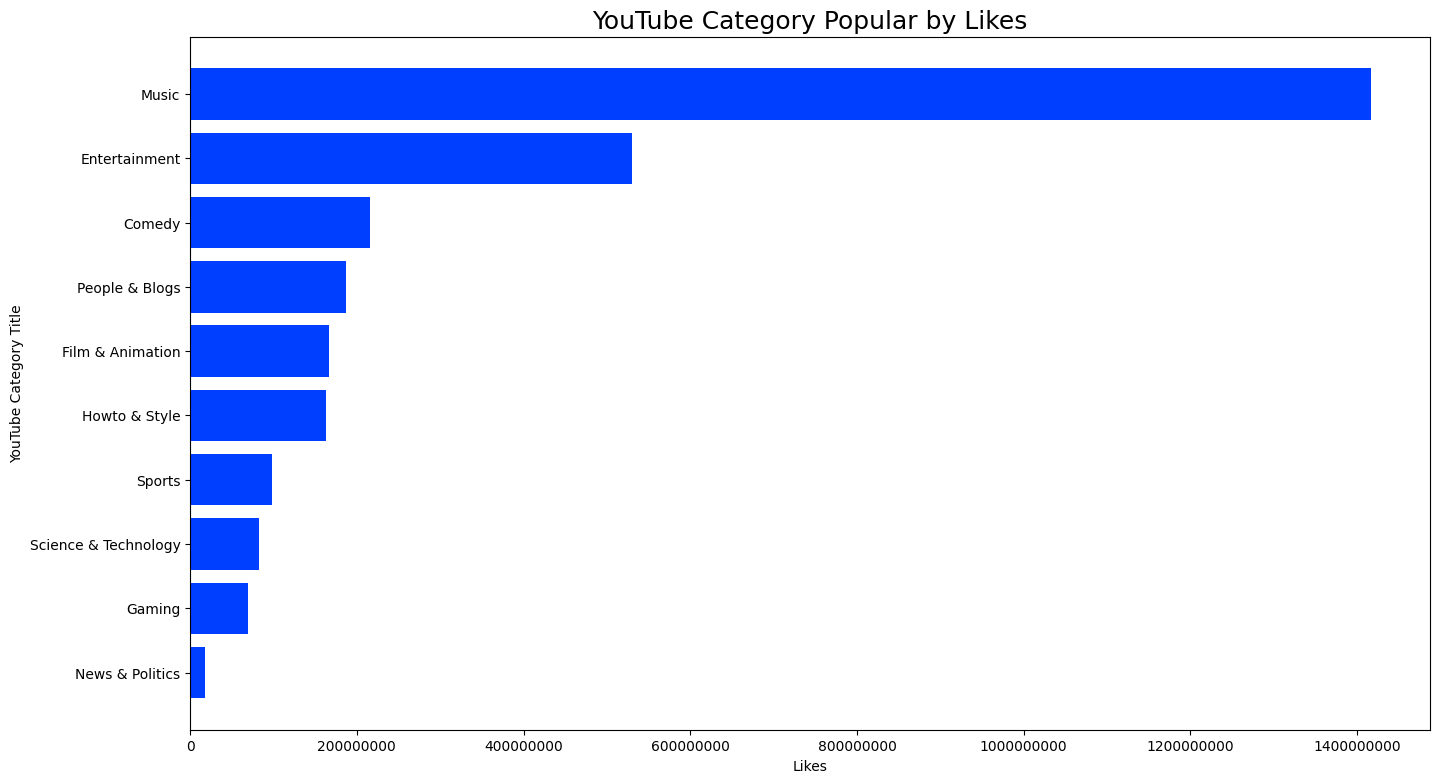

In [185]:
fig, ax = plt.subplots(figsize=(16,9))
id_list_all_vars = id_list_all_vars.sort_values('likes', ascending=True)
ax.barh(id_list_all_vars.index, id_list_all_vars['likes'])
ax.set_title('YouTube Category Popular by Likes', fontsize=18)
ax.set_ylabel('YouTube Category Title')
ax.set_xlabel("Likes")
ax.ticklabel_format(axis='x',style='plain')
plt.savefig('../img/YouTube Category Popular by Likes.jpg', bbox_inches = 'tight')
plt.show()